In [1]:
import pandas as pd
import random

theFile = pd.read_csv("../data/full_df.csv")
theFile

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [2]:

target = theFile.loc[(theFile['Left-Diagnostic Keywords'] == 'cataract') | (theFile['Left-Diagnostic Keywords'] == 'normal fundus')]
pictures = target[['filename']]
pictures

,filename
0,0_right.jpg
1,1_right.jpg
7,8_right.jpg
8,9_right.jpg
12,14_right.jpg
...,...
6356,4637_left.jpg
6358,4639_left.jpg
6360,4641_left.jpg
6378,4672_left.jpg


In [3]:

target

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
12,14,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",14_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,4637,45,Male,4637_left.jpg,4637_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4637_left.jpg
6358,4639,60,Female,4639_left.jpg,4639_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4639_left.jpg
6360,4641,56,Male,4641_left.jpg,4641_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4641_left.jpg
6378,4672,65,Male,4672_left.jpg,4672_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4672_left.jpg


In [4]:
classnames = ['[\'N\']', '[\'D\']','[\'G\']','[\'C\']','[\'A\']','[\'H\']','[\'M\']','[\'O\']']
classnames

["['N']", "['D']", "['G']", "['C']", "['A']", "['H']", "['M']", "['O']"]

In [5]:
pictures = pictures.values.tolist()
pictures = sum(pictures, [])
pictures

['0_right.jpg',
 '1_right.jpg',
 '8_right.jpg',
 '9_right.jpg',
 '14_right.jpg',
 '15_right.jpg',
 '16_right.jpg',
 '24_right.jpg',
 '27_right.jpg',
 '33_right.jpg',
 '42_right.jpg',
 '51_right.jpg',
 '52_right.jpg',
 '54_right.jpg',
 '56_right.jpg',
 '58_right.jpg',
 '60_right.jpg',
 '68_right.jpg',
 '82_right.jpg',
 '83_right.jpg',
 '84_right.jpg',
 '85_right.jpg',
 '88_right.jpg',
 '91_right.jpg',
 '97_right.jpg',
 '103_right.jpg',
 '107_right.jpg',
 '112_right.jpg',
 '117_right.jpg',
 '119_right.jpg',
 '128_right.jpg',
 '132_right.jpg',
 '137_right.jpg',
 '140_right.jpg',
 '143_right.jpg',
 '146_right.jpg',
 '149_right.jpg',
 '160_right.jpg',
 '166_right.jpg',
 '173_right.jpg',
 '187_right.jpg',
 '189_right.jpg',
 '190_right.jpg',
 '191_right.jpg',
 '194_right.jpg',
 '213_right.jpg',
 '214_right.jpg',
 '226_right.jpg',
 '227_right.jpg',
 '228_right.jpg',
 '233_right.jpg',
 '237_right.jpg',
 '245_right.jpg',
 '252_right.jpg',
 '254_right.jpg',
 '255_right.jpg',
 '258_right.jpg',
 '2

In [6]:
#sampling 30 photos 
small_pics= random.sample(pictures, 300)

In [7]:
#grab target if label matches 
classifications=list()
for pic_name in small_pics:
    intermediate = theFile.loc[theFile['filename'] == pic_name]
    label = intermediate['Left-Diagnostic Keywords'].to_string().replace('\'','').replace('    ', '').replace(',', '')
    label = ''.join([i for i in label if not i.isdigit()])
    classifications.append(label)
#classifications contains the "target" corresponding to small_pics

In [8]:
classifications

['normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'norma

In [9]:
import matplotlib.pyplot as plt
import cv2
actual_pics = []

img_res = 120

for file in small_pics:
    img = cv2.imread('../Challenge/images/' + file) #zero makes it greyscale
    #this is resizing all images
    img = cv2.resize(img, (img_res, img_res))
    actual_pics.append(img)

In [10]:
actual_pics[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

<ipython-input-11-60c4e5a5b024>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


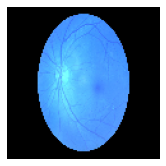

In [11]:
#lbp = local_binary_pattern(img, 12, 3)
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,2,1)
    plt.imshow(actual_pics[i]); plt.axis('off')

In [12]:
print(small_pics[0])
print(classifications[0])

3373_left.jpg
normal fundus


In [13]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

#normalize our data !!
labels = {
    "cataract": 0,
    "normal fundus": 1
}

labels = np.array(labels)


for i in range(len(classifications)):
        if(classifications[i] == 'cataract'):
               classifications[i] = 0
        elif(classifications[i] == 'normal fundus'):
                classifications[i] = 1
                
classifications = utils.to_categorical(classifications)
   


In [14]:
actual_pics = np.array(actual_pics)
classifications = np.array(classifications)

classifications = np.array(classifications)
actual_pics.astype('float32')/255.0
# plt.subplot(1,2,1)
# plt.imshow(actual_pics[0]); plt.axis('off')
    
#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(actual_pics, classifications, test_size=0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
X_train, xt, y_train, yt = train_test_split(X_train, y_train, test_size=0.1, shuffle = False)

In [15]:
#begin NN 
import logging
logging.basicConfig()
import tensorflow as tf 

In [16]:
import numpy
len(actual_pics[2][0])

120

In [17]:

print(X_train.shape)
y_train.shape

(216, 120, 120, 3)


(216, 2)

In [18]:
# convert to numpy arrays
x = np.array(X_train)
y = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

xt = np.array(xt)
yt = np.array(yt)

In [19]:
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout 

def my_model():
    inputs = keras.Input(shape = (120, 120, 3))
    x = layers.Conv2D(
        32,(3,3), padding = 'same', kernel_regularizer=regularizers.l2(0.01)
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(
        64,(3,3), padding = 'same', kernel_regularizer=regularizers.l2(0.01)
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(
        64,(3,3), padding = 'same', kernel_regularizer=regularizers.l2(0.01)
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(
        64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)
    )(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(2)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    return model
    
model = my_model()
model.summary()
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate = 0.0008)

#early stopping stuff
# simple early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 64)      1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 120, 120, 64)      256       
_________________________________________________________________
tf.nn.relu_2 (TFOpLambda)    (None, 120, 120, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 921600)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                58982464  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0     

In [20]:
print(np.size(x))
print(np.shape(x))
print(np.size(y))
print(np.shape(y))

9331200
(216, 120, 120, 3)
432
(216, 2)


In [21]:
#this stores the fitting information 
#put in our own data for the images and labelling stuff

history = model.fit(x, y, epochs = 30, validation_data = (xt, yt), callbacks = [es])

#dont forget to keep training until your accuracy becomes bad 

Epoch 1/30
7/7 [==============================] - 12s 1s/step - loss: 4.8257 - accuracy: 0.5798 - val_loss: 4.0174 - val_accuracy: 0.8750
Epoch 2/30
7/7 [==============================] - 8s 1s/step - loss: 5.0638 - accuracy: 0.8562 - val_loss: 5.6801 - val_accuracy: 0.8750
Epoch 3/30
7/7 [==============================] - 13s 2s/step - loss: 6.2856 - accuracy: 0.7840 - val_loss: 6.4132 - val_accuracy: 0.8750
Epoch 4/30
7/7 [==============================] - 12s 2s/step - loss: 6.4214 - accuracy: 0.7188 - val_loss: 6.5165 - val_accuracy: 0.8750
Epoch 5/30
7/7 [==============================] - 11s 2s/step - loss: 6.7703 - accuracy: 0.7866 - val_loss: 6.6822 - val_accuracy: 0.7500
Epoch 6/30
7/7 [==============================] - 15s 2s/step - loss: 7.0795 - accuracy: 0.6556 - val_loss: 6.7103 - val_accuracy: 0.2917
Epoch 7/30
7/7 [==============================] - 12s 2s/step - loss: 7.7920 - accuracy: 0.6646 - val_loss: 6.5583 - val_accuracy: 0.6667
Epoch 8/30
7/7 [===================

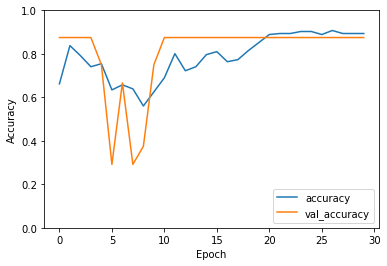

In [22]:
# Plot the change in accuracy and validation accruacy as a function of epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')

In [23]:
performance = model.evaluate(X_test, y_test, verbose=1)



2/2 [==============================] - 1s 341ms/step - loss: 2.9580 - accuracy: 0.8667
